## Jupyter Pyplot Numpy Problem Sheet
###### Solution by Ervin Mamutov - github.com/imervin

#### Citation
[1]https://en.wikipedia.org/wiki/Iris_flower_data_set

[2]https://en.wikipedia.org/wiki/Multivariate_statistics

[3]https://en.wikipedia.org/wiki/Linear_discriminant_analysis

[4]https://seaborn.pydata.org/index.html

### Fisher's Iris Dataset
Fisher's Iris Dataset is a multivariate (analysis of more than out outcome variable. [2]) dataset of the Iris flower. The dataset was introduced by a British statistician Ronald Fisher in his paper *The use of multiple measurements in taxonomic problems (1936)* as an example of linear discriminant analysis (method to characterize or separate two or more classes of objects or events for statistics, pattern matching and machine learning to find a linear combination of features. [3]). [1]

### What is the dataset?
The dataset consists of 50 samples from each of three species of Iris (setosa, versicolor and virginica with four features that were measured for each sample: length and width of the sepals and petals, in centimeters. [1]

### What is the dataset used for?
The dataset was used to develop a linear discriminant model to distinguish the species from each other. [1]


### Get and load the data.
I have downloaded a CSV file of Fisher's Iris Dataset. The next step I want to take is to distinguish what each piece of data represents.

I found the attribute information you see below here - https://archive.ics.uci.edu/ml/datasets/iris.

| First              | Second            | Third              | Fourth            | Fifth |
| :----------------- |:------------------| :------------------|:------------------| :-----|
| sepal length in cm | sepal width in cm | petal length in cm | petal width in cm | Class |

Now that I know what the structure and data represents, I can store it into a numpy array(s).

In [1]:
# Import numpy
import numpy as np

# Adapted code from - https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html#numpy.loadtxt
# Read column by column into 5 different arrays, one for sepal length, one for sepal width, one for petal length, one for petal width and one for iris class.
# Read in by using a "," delimiter (because it's a CSV file), set the first 4 variables as float type and the last one as a 15 character long string.
# Usecols allows me to take the value in each column and place it into an appropriate array.
sepal_L, sepal_W, petal_L, petal_W, iris_class = np.loadtxt(open("IRIS_dataset.csv", "rb"), 
                                                            delimiter=",", 
                                                            dtype={'names': ('sepal_L', 'sepal_W', 'petal_L', 'petal_W', 'iris_class'), 'formats': ('float', 'float', 'float', 'float', 'S15')}, 
                                                            usecols=(0,1,2,3,4), 
                                                            unpack=True)

print("Sepal Lengths:\n",sepal_L,"\nSepal Widths:\n",sepal_W,"\nPetal Lengths:\n",petal_L,"\nPetal Widths:\n",petal_W,"\nIris Names:\n",iris_class)

Sepal Lengths:
 [ 5.1  4.9  4.7  4.6  5.   5.4  4.6  5.   4.4  4.9  5.4  4.8  4.8  4.3  5.8
  5.7  5.4  5.1  5.7  5.1  5.4  5.1  4.6  5.1  4.8  5.   5.   5.2  5.2  4.7
  4.8  5.4  5.2  5.5  4.9  5.   5.5  4.9  4.4  5.1  5.   4.5  4.4  5.   5.1
  4.8  5.1  4.6  5.3  5.   7.   6.4  6.9  5.5  6.5  5.7  6.3  4.9  6.6  5.2
  5.   5.9  6.   6.1  5.6  6.7  5.6  5.8  6.2  5.6  5.9  6.1  6.3  6.1  6.4
  6.6  6.8  6.7  6.   5.7  5.5  5.5  5.8  6.   5.4  6.   6.7  6.3  5.6  5.5
  5.5  6.1  5.8  5.   5.6  5.7  5.7  6.2  5.1  5.7  6.3  5.8  7.1  6.3  6.5
  7.6  4.9  7.3  6.7  7.2  6.5  6.4  6.8  5.7  5.8  6.4  6.5  7.7  7.7  6.
  6.9  5.6  7.7  6.3  6.7  7.2  6.2  6.1  6.4  7.2  7.4  7.9  6.4  6.3  6.1
  7.7  6.3  6.4  6.   6.9  6.7  6.9  5.8  6.8  6.7  6.7  6.3  6.5  6.2  5.9] 
Sepal Widths:
 [ 3.5  3.   3.2  3.1  3.6  3.9  3.4  3.4  2.9  3.1  3.7  3.4  3.   3.   4.
  4.4  3.9  3.5  3.8  3.8  3.4  3.7  3.6  3.3  3.4  3.   3.4  3.5  3.4  3.2
  3.1  3.4  4.1  4.2  3.1  3.2  3.5  3.1  3.   3.4  3.5  

### Create a simple plot
In the code above I stored the data from the CSV files into numpy arrays, this lets me work with the data in the CSV files.

I can use Pyplot to create a simple plot of data. I will plot all of the sepal lengths onto the x-axis and all of the sepal widths onto the y-axis. This lets me visual the data in the form of a scatter plot.

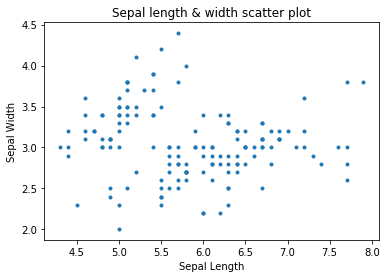

In [2]:
# Import matplotlib's pyplot
import matplotlib.pyplot as plt

# Set the sepal_L (length) as the x-axis and sepal_W (width) as the y-axis, plotted as dots(.). 
plt.scatter(sepal_L, sepal_W, marker='.')
# Set the x-axis label
plt.xlabel('Sepal Length')
# Set the y-axis label
plt.ylabel('Sepal Width')
# Set the diagram title
plt.title('Sepal length & width scatter plot')
# Display the plot
plt.show()

### Create a more complex plot

The diagram above is showing all of the sepal lengths and widths as points on a scatter plot. Now I want to create a more complex diagram with a color identifier for each of the three classes of the Iris flower. Red for setosa, green for versicolor and blue for virginica.

Using Python, I can create an object template for the different types of Iris with a constructor that has x,y,color and label arguments. I can dynamically populate the scatter plot using getter methods from the Iris class object.

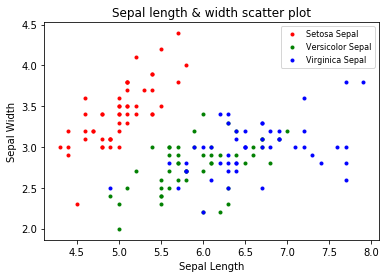

In [3]:
# Object Iris 4 values - x,y values, the color and the label for the plot.
class Iris:
    
    # Constructor
    def __init__(self, xValues, yValues, color, label):
        self.xValues = xValues
        self.yValues = yValues
        self.color = color
        self.label = label
    
    # Getters
    def getX(self):
        return self.xValues
    
    def getY(self):
        return self.yValues
    
    def getColor(self):
        return self.color
    
    def getLabel(self):
        return self.label

# Instantiate instances of the Iris object feeding in the first 50 sepal lengths and widths as the setosa,
# the next 50 as the versicolor etc. (The data is sorted so this method will work.). Adding the color of the
# points and the label for the legend.
setosaClass = Iris([x for x in sepal_L[0:49:1]],[y for y in sepal_W[0:49:1]],"r","Setosa Sepal")
versicolorClass = Iris([x for x in sepal_L[49:99:1]],[y for y in sepal_W[49:99:1]],"g","Versicolor Sepal")
virginicaClass = Iris([x for x in sepal_L[99:149:1]],[y for y in sepal_W[99:49:1]],"b","Virginica Sepal")

# A list with the class names from above.
classes = [setosaClass, versicolorClass, virginicaClass]

# Function to add points to the scatter plot dynamically.
def addScatters(className):
    # use the getters from the Object to create the scatter plot
    x = className.getX()
    y = className.getY()
    c = className.getColor()
    l = className.getLabel()
    plt.scatter(x,y, marker='.', color = c, label = l)

# Loop over the class names and add the scatters dynamically.
for i in classes:
    addScatters(i)

# Add the labels, titles and legend - then display the plot.
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal length & width scatter plot')
plt.legend(loc='best', numpoints=1, ncol=1, fontsize=8)
plt.show()

### Let's use Seaborn!

#### What is seaborn?
Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.[4]

Using seaborn, I can visualize the Iris dataset as a scatterplot matrix, one for each of the variables. I can use the predefined code from seaborns website to create the Iris dataset scatterplot matrix.

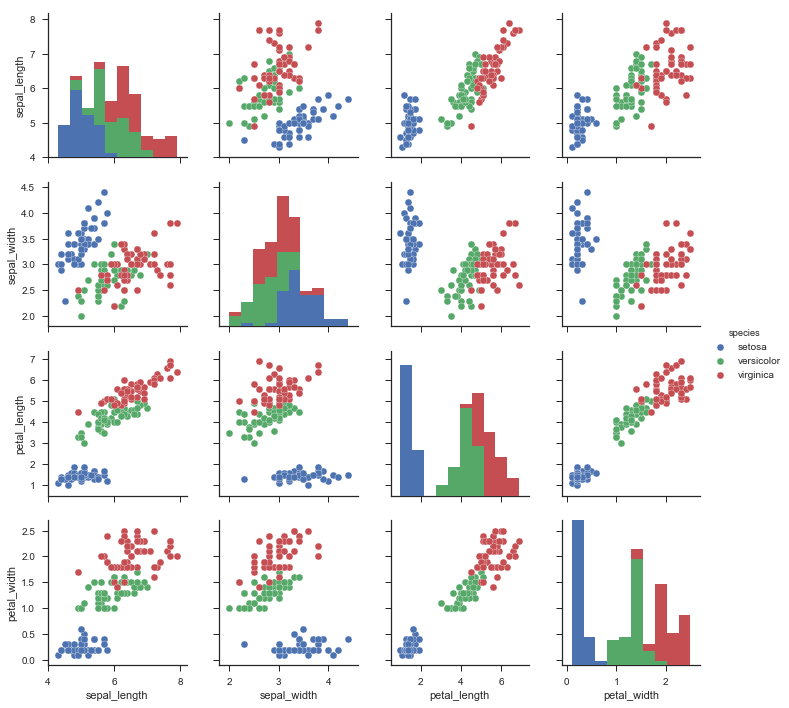

In [4]:
# Import seaborn
import seaborn as sns

# Adapted code from - https://seaborn.pydata.org/examples/scatterplot_matrix.html
# set the style to ticks
sns.set(style="ticks")

# Load the predefined iris library from seaborn.
df = sns.load_dataset("iris")

# Use the data the was loaded in above to create a "pairplot" of all the variables.
sns.pairplot(df, hue="species")

plt.show()

### Plotting a Line

Now I want to plot a straight best fit line between the petal length and width points.
We can plot lines between the different points on the scatterplot but only one of those lines can be the "best fit" line. This means that the line's cost (distance from all the points) is the lowest.

To calculate the lines cost we can use the formula:

$$ \sum_i (y_i - mx_i - c)^2 $$


Numpy's polyfit will allow me to find the best fit line. Polyfit will take 3 arguments, the length, the width and the dimension and return an list with two floats. The first float represents the slope and the second float represents the cost.

$$  y = mx + c $$

The formula above is the formula of a line. Using this formula, I can plot the line by passing in the slope and cost from the polyfit function.


Best slope: 0.4164194 and cost: -0.3665144


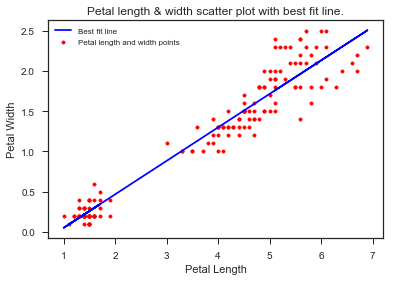

In [5]:
# Find the best fit line using numpys polyfit function
bestFitLine = np.polyfit(petal_L, petal_W, 1)
print("Best slope: %f4 and cost: %f4"%(bestFitLine[0],bestFitLine[1]))
# Plot the best fit line.
plt.scatter(petal_L, petal_W, marker='.', color="r", label='Petal length and width points')
# Start the point at petal_L (can't figure out why) and use y = mx+c to find y.
plt.plot(petal_L, bestFitLine[0] * petal_L + bestFitLine[1], 'b-', label='Best fit line')

# Set label,title,legend then display the plot.
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal length & width scatter plot with best fit line.')
plt.legend(loc='best', numpoints=1, ncol=1, fontsize=8)
plt.show()


### Finding the r-squared value.

The R-Squared (Coefficient of Determination) value is a precentage of how many points the line touchs.

In [10]:
# Adpated code from - https://stackoverflow.com/questions/893657/how-do-i-calculate-r-squared-using-python-and-numpy
# Polynomial Regression
def polyfit(x, y, degree):
    results = {}
    
    # Finding the coefficient
    coeffs = np.polyfit(x, y, degree)

     # Polynomial Coefficients
    results['polynomial'] = coeffs.tolist()
    
    # r-squared
    p = np.poly1d(coeffs)
    # fit values, and mean
    yhat = p(x)                      # or [p(z) for z in x]
    ybar = np.sum(y)/len(y)          # or sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
    sstot = np.sum((y - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
    results['determination'] = ssreg / sstot
    
    return results

print(polyfit(petal_L, petal_W, 1))

{'polynomial': [0.41641913228540106, -0.36651404521672715], 'determination': 0.92690122792200369}


### Find the best fit line of setosa petals

I can re-use the code I have written above to now find the best fit line for setosa petals.

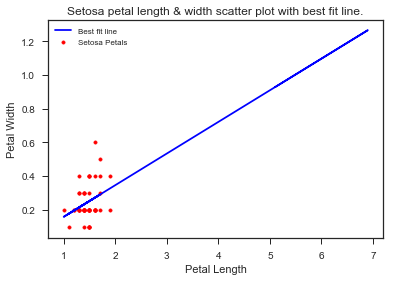

In [32]:
# Re-use the class to create a petal class - feed it 0-49 lengths and widths
setosaPetalClass = Iris([x for x in petal_L[0:49:1]],[y for y in petal_W[0:49:1]],"r","Setosa Petals")

# Re-use the addScatter to create the points on thep lot
addScatters(setosaPetalClass)

# Get the x and y lists for the best line calculation
setosaPetalX = setosaPetalClass.getX()
setosaPetalY = setosaPetalClass.getY()

# Calculate the best line
bestFitLine = np.polyfit(setosaPetalX, setosaPetalY, 1)

#
plt.plot(petal_L, bestFitLine[0] * petal_L + bestFitLine[1], 'b-', label='Best fit line')

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Setosa petal length & width scatter plot with best fit line.')
plt.legend(loc='best', numpoints=1, ncol=1, fontsize=8)
plt.show()
